# Linear and Quadratic Approximations Numerically

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

# Numerical Derivative

$$
\begin{aligned}
\text{Analytically} : \frac{df}{dx} &= \lim_{h \to 0} \frac{f(x+h) - f(x)}{h} 
\\
\text{Numerically} : \frac{df}{dx} &\cong  \frac{f(x+h) - f(x)}{h} ,\quad \text{for } h \text{ "small".}
\\
\text{Practically} : \frac{df}{dx} &\cong  \frac{f(x+hx) - f(x)}{hx} ,\quad \text{for } h \cong 10^{-8}
\end{aligned} 
$$ 


In [3]:
def d(func, x0, h=1.49e-08):
    # Take a forward step
    if x0 != 0:
        x1 = x0 * (1 + h)
    
    # If 0, then we need to take absolute step
    else:
        x1 = h

    step = x1 - x0
    grad = (func(x1) - func(x0))/step
    return grad

# Experiment

$$
\begin{aligned} 
f(x) &= x^2  - x
\\ \Rightarrow f'(x) &= 2x - 1 
\end{aligned} 
$$ 

In [4]:
f  = lambda x : x**2 - x 
df = lambda x : 2*x - 1  

In [5]:
x = 1.0 
print(df(x), d(f, x))

1.0 1.0000000149023225


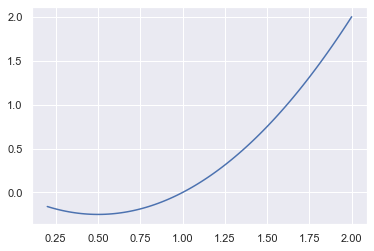

In [6]:
xx = np.linspace(0.2, 2., 100)
plt.plot(xx, f(xx)); 

# Second derivative

$$
\begin{aligned} 
f(x) &= x^2  
\\ \Rightarrow f'(x) &= 2x - 1 
\\ \Rightarrow f''(x) &= 2
\end{aligned} 
$$ 

In [7]:
def dd(f, x0, h_outer=1e-6, h_inner=1e-8): 
    df = lambda x: d(f, x, h_inner)
    return d(df, x0, h_outer)

In [8]:
dd(f, 1.)

1.9983994598550046

# Approximating functions 

$$\begin{aligned}
\text{Linear}    : \tilde{f}(x) &= f(x_0) + f'(x_0) (x-x_0) \\
\text{Quadratic} : \bar{f}(x)   &= f(x_0) + f'(x_0) (x-x_0) + \frac12 f''(x_0) (x-x_0)^2
\end{aligned}$$ 

In [9]:
def f_l(x, f, x0, h=1e-8): 
    f0 = f(x0)
    g0 = d(f, x0, h)
    return f0 + g0*(x-x0)

In [10]:
def f_q(x, f, x0): 
    f0 = f(x0)
    g0 = d(f, x0)
    h0 = dd(f, x0)
    return f0 + g0*(x-x0) + 0.5 * h0 * (x-x0)**2

In [11]:
def plot(f, x0, xx, ylim=None): 
    
    fig,ax = plt.subplots(); 
    ax.plot(xx, f(xx),        label='Function')
    ax.plot(xx, f_l(xx,f,x0), label='Linear Approximation', linestyle='--')
    ax.plot(xx, f_q(xx,f,x0), label='Quadratic Approximation', linestyle='--')
    ax.plot(x0, f(x0), 'or',  label='x0')
    ax.legend();
    ax.set_ylim(ylim)

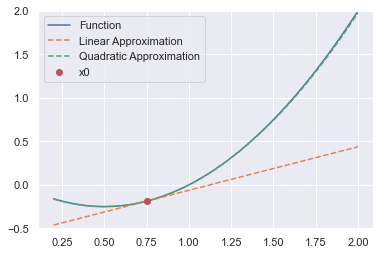

In [12]:
x0 = 0.75
plot(f, x0, xx, ylim=(-.5, 2))

# Other functions 

$$ f(x) = \frac{1}{x} + \exp(x), \quad x \in (0; 2]. $$

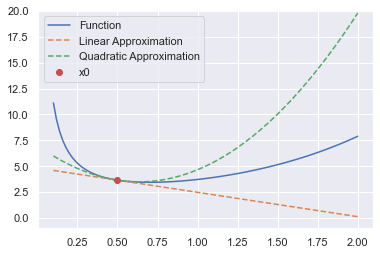

In [13]:
f = lambda x : 1.0 / x + np.exp(x)
xx = np.linspace(.1, 2, 100)
x0 = 0.5
plot(f, x0, xx, ylim=(-1,20))

# The importance of step sizes 

<ipython-input-3-0967e1554b4c>:11: RuntimeWarning: invalid value encountered in double_scalars
  grad = (func(x1) - func(x0))/step


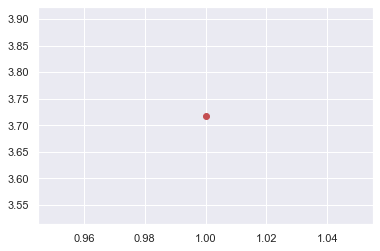

In [14]:
x0 = 1.0
xx = np.linspace(1.-1e-17, 1.+1e-17)

fig, ax = plt.subplots();
ax.plot(xx, f(xx)); 
ax.plot(xx,f_l(xx, f, x, h=1e-18), '--');
ax.plot(x0,f(x0), 'or'); 


# Vector inputs

If our input function takes a *vector* rather than a scalar input, then we need to modify the first and second derivatives. 

In [15]:
def d(func, x0, h=1.49e-08):
    '''d(): gradient of a function, `func`, taking *vector* input, x0
    Returns
        grad: (K,) vector
    '''
    K = x0.size
    f0 = func(x0)
    grad = np.empty((K,))
    for k in range(K): 
        
        # 1. find forward point
        x1 = np.copy(x0)
        if x0[k] != 0:
            x1[k] = x0[k] * (1.0 + h)
        else: # If 0, then we need to take absolute step
            x1[k] = h
        
        # 2. step length 
        step = x1[k] - x0[k]
        
        # 3. Newton quotient 
        grad[k] = (func(x1) - f0)/step
        
    return grad

def hess(f, x0, h_outer=1e-5, h_inner=1e-5): 
    '''hess(): compute the (K,K) Hessian matrix of partial derivatives'''
    K = x0.size
    H = np.empty((K,K))
    f0 = f(x0)
    
    for k in range(K): 
        # 1. function handle to the 1st derivative's k'th entry 
        def d1(x): 
            g = d(f, x, h_inner)
            return g[k]
        
        # 2. compute the gradient of the first derivative 
        H[k, :] = d(d1, x0, h_outer)
        
    return H 

## Numerical vs. analytic

Verifying that our numerical gradient/hessian functions work using the Rosenbrock function.

In [16]:
# import analytic functions so we have something to compare our analytic functions to 
from scipy.optimize import rosen, rosen_der, rosen_hess

In [17]:
x0 = np.array([-1., -4.])

In [18]:
rosen(x0) # the function 

2504.0

In [19]:
rosen_der(x0) # analytic gradient

array([-2004., -1000.])

In [20]:
d(rosen, x0) # numerical gradient

array([-2004.00001943, -1000.00000644])

In [21]:
rosen_hess(x0) # analytic hessian

array([[2802.,  400.],
       [ 400.,  200.]])

In [22]:
hess(rosen, x0) # numerical hessian 

array([[2802.02794125,  400.00259105],
       [ 400.00259105,  200.00131532]])

In [76]:
print(f'Relative absolute error')
np.abs(hess(rosen, x0) / rosen_hess(x0) - 1.0)

Relative absolute error


array([[9.97189416e-06, 6.47761844e-06],
       [6.47761844e-06, 6.57658283e-06]])

## Minimizing Rosen using Newton 

In [69]:
# initial value 
x0 = np.array([-1., -4.])

maxit = 100
x = np.copy(x0) 
xx = [x0]
ff = [rosen(x0)]

for it in range(maxit): 

    # 1. compute 1st and 2nd derivatives 
    g = d(rosen, x)
    h = hess(rosen, x)

    # 2. take step 
    step = - np.linalg.solve(h, g)
    x = x + step

    # 3. store 
    xx.append(x) 
    ff.append(rosen(x))

    # 4. check convergence 
    if (np.abs(g)<1e-8).all(): 
        print(f'Success in {it} iterations!')
        break

Show the path in a 3d graph 

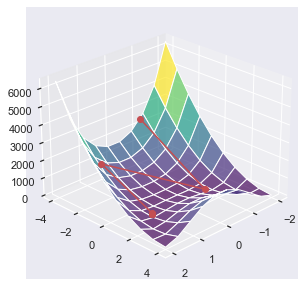

In [72]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111,projection='3d')
Np = 10
X,Y = np.meshgrid(np.linspace(-2,2,Np), np.linspace(-4,4,Np))
Z = np.empty((Np,Np))
for i in range(Np): 
    for j in range(Np): 
        t = np.array([X[i,j], Y[i,j]])
        Z[i,j] = rosen(t)
ax.plot_surface(X,Y,Z,cmap='viridis',alpha=0.7)

xx = np.array(xx)
ff = np.array(ff)
ax.plot(xx[:,0], xx[:,1], ff, '-or')

ax.view_init(25, 45)